In [11]:
from pymatgen.ext.matproj import MPRester
import numpy as np

import matplotlib.pyplot as plt
from pymatgen.phonon.plotter import PhononBSPlotter

# Structure de bande de phonons

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

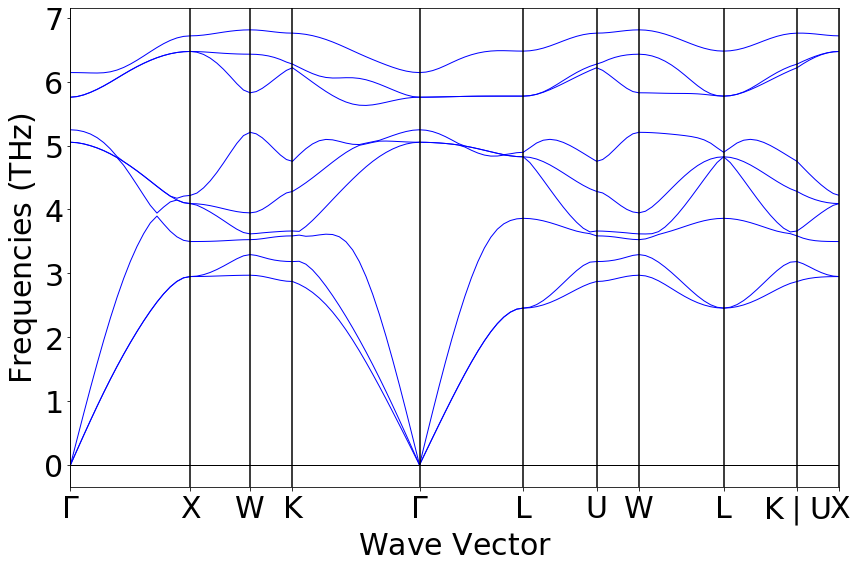

In [12]:
with MPRester("cG5llIAs5Ub9zbbJaG") as m:    
    get_phonon = m.get_phonon_bandstructure_by_material_id("mp-961713")

PhononBSPlotter(get_phonon).get_plot()

# Zone de Brillouin

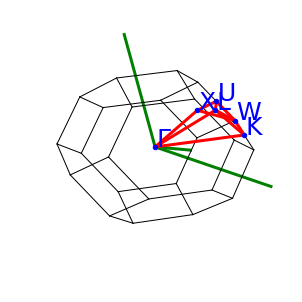

In [13]:
PhononBSPlotter(get_phonon).plot_brillouin()

# Bandes acoustiques

Les branches accoustiques correspondent aux bandes où la fréquence du phonon associée est nulle au centre de la zone de Brillouin. Nous avons donc trois possibilités. Tout d'abord la direction Γ-X, ensuite la direction K-Γ et finalement la direction Γ-L.

# Vitesse du son

La vitesse de propagation du son dans un solide est la propagation d'un phonon dans le réseau réciproque et par conséquent la zone de Brillouin. 

Cette vitesse est définie comme: 
$$v_s = \frac{\partial \omega}{\partial q} = 2\pi \frac{\partial f}{\partial q}$$

où $\omega$ est la relation de dispersion du matériau, $q$ est le vecteur d'onde et $f$ est la fréquence.

Comme la a vitesse de propagation du son est anisotrope, il est possible qu'il y ait des changements de vitesse important entre les vitesses déterminées pour chaque direction.

In [14]:
def f1(bande, distance):
    return  2 * np.pi * np.abs((bande[1] - bande[0])*10**12) / ((distance[1] - distance[0])*10**10)

def f2(bande, distance):
    return  2 * np.pi * np.abs((bande[-1] - bande[-2])*10**12) / ((distance[-1] - distance[-2])*10**10)

In [15]:
# Récupération de nos données
data = PhononBSPlotter(get_phonon).bs_plot_data()


frequence = data['frequency']
ticks = data['ticks']
distances = data['distances']


bande_1 = frequence[0][1]
bande_2 = frequence[3][0]
bande_3 = frequence[4][2]


vitesse_son_1 = f1(bande_1, distances[0])
vitesse_son_2 = f2(bande_2, distances[3])
vitesse_son_3 = f1(bande_3, distances[4])


print("La vitesse du son de la courbe 1 dans la direction Γ - X vaut " + str(vitesse_son_1) + " m/s.")
print("La vitesse du son de la courbe 2 dans la direction K - Γ vaut " + str(vitesse_son_2) + " m/s.")
print("La vitesse du son de la courbe 3 dans la direction Γ - L vaut " + str(vitesse_son_3) + " m/s.")

La vitesse du son de la courbe 1 dans la direction Γ - X vaut 2676.300259338232 m/s.
La vitesse du son de la courbe 2 dans la direction K - Γ vaut 2374.5099449631534 m/s.
La vitesse du son de la courbe 3 dans la direction Γ - L vaut 4854.559039503796 m/s.


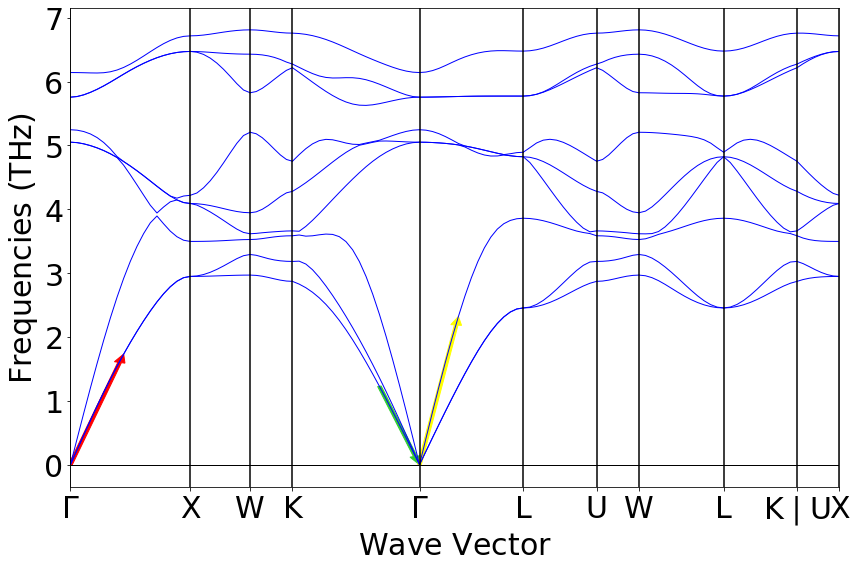

In [16]:
PhononBSPlotter(get_phonon).get_plot()

plt.arrow(distances[0][0], bande_1[0], distances[0][8]-distances[0][0], bande_1[8]-bande_1[0], color='red', width = 0.03, length_includes_head =True)

plt.arrow(distances[3][13], bande_2[13], distances[3][-1]-distances[3][13], bande_2[-1]-bande_2[13], color='limegreen', width = 0.03, length_includes_head =True)

plt.arrow(distances[4][0], bande_3[0], distances[4][6]-distances[4][0], bande_3[6]-bande_3[0], color='yellow', width = 0.03, length_includes_head =True)